Comparison with genes confirmed as a core signature for homeostatic microglia

**Table of content**
1. [Male vs Female at 52w](#Male-vs-Female-at-52w)
2. [GF vs SPF](#GF-vs-SPF)

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [106]:
load("../results/dge/norm_counts.RData")
load("../results/dge/z_scores.RData")
load("../results/dge/metadata.RData")

In [27]:
t = read.xlsx("../data/differentially_regulated_microglial_genes.xlsx", 1, header=TRUE, colClasses=NA)
t = t[,c(3,5)]
colnames(t) = c("cluster1", "cluster2")

cluster1 = t %>%
    rename(cluster = cluster1) %>%
    filter(!is.na(cluster)) %>%
    filter(cluster != "NA") %>%
    select(cluster)
dim(cluster1)

cluster2 = t %>%
    rename(cluster = cluster2) %>%
    filter(!is.na(cluster)) %>%
    filter(cluster != "NA") %>%
    select(cluster)
dim(cluster2)

cluster = union(cluster1, cluster2)
dim(cluster)

[1] 256   1

[1] 332   1

[1] 438   1

# Male vs Female at 52w

In [46]:
M_vs_F = read.table("../results/dge/gender-effect/gender_age/fc_deg", h = T, row.names = 1, sep = "\t")
colnames(M_vs_F) = c("M VS F (8w)", "M VS F (52w)", "M VS F (104w)")

## Extract genes for clusters

In [52]:
M_vs_F_52w = list()
M_vs_F_52w$all = M_vs_F %>%
    rownames_to_column('genes') %>%
    rename(middle_aged = "M VS F (52w)") %>%
    filter(!is.na(middle_aged)) %>%
    select(c(genes, middle_aged)) %>%
    rename("M VS F (52w)" = middle_aged) %>%
    column_to_rownames('genes')
M_vs_F_52w$in_cluster1 = M_vs_F_52w$all %>%
    rownames_to_column('genes') %>%
    filter(genes %in% cluster1[,'cluster']) %>%
    column_to_rownames('genes')
M_vs_F_52w$in_cluster2 = M_vs_F_52w$all %>%
    rownames_to_column('genes') %>%
    filter(genes %in% cluster2[,'cluster']) %>%
    column_to_rownames('genes')
M_vs_F_52w$in_one_cluster = M_vs_F_52w$all %>%
    rownames_to_column('genes') %>%
    filter(genes %in% cluster[,'cluster']) %>%
    column_to_rownames('genes')
sapply(M_vs_F_52w, dim)
capture.output(M_vs_F_52w, file = "../results/dge/homeostatic_core_signature_genes/M_vs_F_52w")

all,in_cluster1,in_cluster2,in_one_cluster
4299,178,213,286
1,1,1,1


In [74]:
full_M_vs_F = M_vs_F %>%
    rownames_to_column('genes') %>%
    rename(middle_aged = "M VS F (52w)") %>%
    filter(!is.na(middle_aged)) %>%
    mutate(in_cluster1 = (genes %in% cluster1[,'cluster'])) %>%
    mutate(in_cluster2 = (genes %in% cluster2[,'cluster'])) %>%
    mutate(in_one_cluster = (genes %in% cluster[,'cluster'])) %>%
    mutate(in_both_cluster = (genes %in% cluster1[,'cluster'] & genes %in% cluster2[,'cluster'])) %>%
    rename("M VS F (52w)" = middle_aged) %>%
    column_to_rownames('genes')
capture.output(full_M_vs_F, file = "../results/dge/homeostatic_core_signature_genes/M_vs_F")
full_M_vs_F %>%
    select(c(in_cluster1, in_cluster2, in_one_cluster, in_both_cluster)) %>%
    summarise_all(sum)

in_cluster1,in_cluster2,in_one_cluster,in_both_cluster
178,213,286,105


## Log2FC

In [63]:
data = rbind(M_vs_F_52w$all, M_vs_F_52w$in_cluster1, M_vs_F_52w$in_cluster2) %>%
    rename(log2fc = "M VS F (52w)") %>%
    rownames_to_column('genes') %>%
    mutate(type = c(rep("all", dim(M_vs_F_52w$all)[1]), rep("in cluster 1", dim(M_vs_F_52w$in_cluster1)[1]), rep("in cluster 2", dim(M_vs_F_52w$in_cluster2)[1]))) 
head(data)

genes,log2fc,type
0610010K14Rik,-0.4018530,all
0610030E20Rik,0.8366523,all
0610039K10Rik,2.1683734,all
1110004F10Rik,-0.1979644,all
1110008F13Rik,-0.1686105,all
1110037F02Rik,0.5701119,all


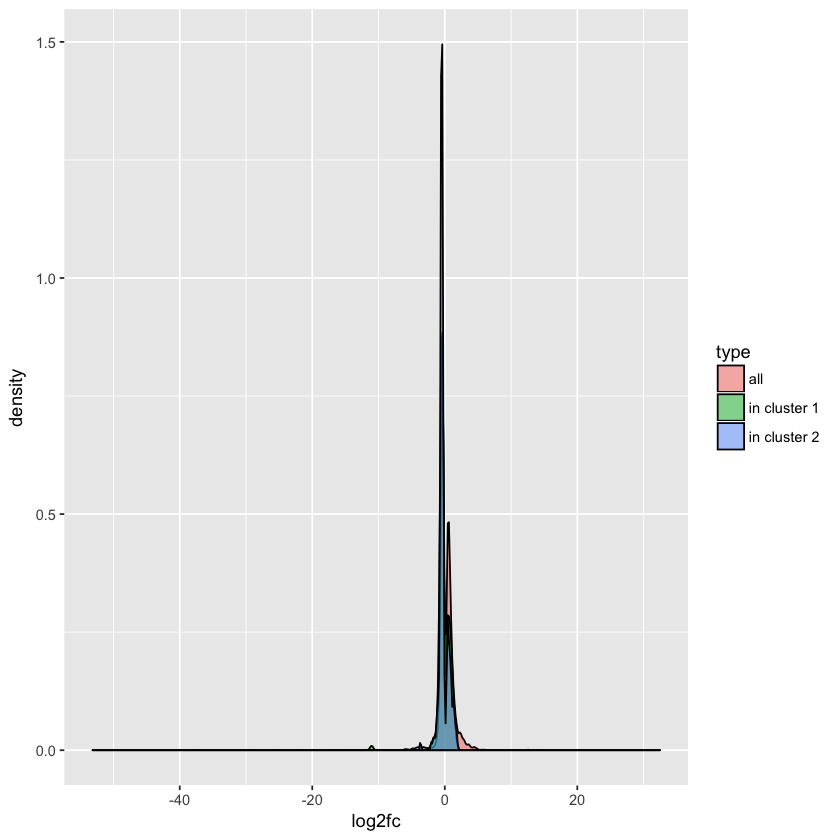

In [64]:
ggplot(data, aes(x = log2fc, fill = type)) + geom_density(alpha = 0.5)

# GF vs SPF

In [65]:
GF_vs_SPF = read.table("../results/dge/type-effect/type_age/fc_deg", h = T, row.names = 1, sep = "\t")
colnames(GF_vs_SPF) = c("GF VS SPF (8w)", "GF VS SPF (52w)", "GF VS SPF (104w)")

## Extract genes for clusters

In [66]:
full_GF_vs_SPF = GF_vs_SPF %>%
    rownames_to_column('genes') %>%
    mutate(in_cluster1 = (genes %in% cluster1[,'cluster'])) %>%
    mutate(in_cluster2 = (genes %in% cluster2[,'cluster'])) %>%
    mutate(in_one_cluster = (genes %in% cluster[,'cluster'])) %>%
    mutate(in_both_cluster = (genes %in% cluster1[,'cluster'] & genes %in% cluster2[,'cluster'])) %>%
    column_to_rownames('genes')
capture.output(full_GF_vs_SPF, file = "../results/dge/homeostatic_core_signature_genes/GF_vs_SPF")

In [72]:
full_GF_vs_SPF %>%
    select(c(in_cluster1, in_cluster2, in_one_cluster, in_both_cluster)) %>%
    summarise_all(sum)

in_cluster1,in_cluster2,in_one_cluster,in_both_cluster
103,141,186,58


In [141]:
GF_vs_SPF_8w = full_GF_vs_SPF %>%
    rownames_to_column('genes') %>%
    rename(young = "GF VS SPF (8w)") %>%
    filter(!is.na(young)) %>%
    select(c(genes, young, in_cluster1, in_cluster2, in_one_cluster, in_both_cluster)) %>%  
    column_to_rownames('genes')
GF_vs_SPF_52w = full_GF_vs_SPF %>%
    rownames_to_column('genes') %>%
    rename(middle_age = "GF VS SPF (52w)") %>%
    filter(!is.na(middle_age)) %>%
    select(c(genes, middle_age, in_cluster1, in_cluster2, in_one_cluster, in_both_cluster)) %>% 
    column_to_rownames('genes')
GF_vs_SPF_104w = full_GF_vs_SPF %>%
    rownames_to_column('genes') %>%
    rename(old = "GF VS SPF (104w)") %>%
    filter(!is.na(old)) %>%
    select(c(genes, old, in_cluster1, in_cluster2, in_one_cluster, in_both_cluster)) %>% 
    column_to_rownames('genes')

In [133]:
cluster_genes = unlist(full_GF_vs_SPF %>% rownames_to_column('genes') %>% filter(in_one_cluster) %>% select(genes))
non_cluster_genes = unlist(full_GF_vs_SPF %>% rownames_to_column('genes') %>% filter(!in_one_cluster) %>% select(genes))
length(cluster_genes)
length(non_cluster_genes)

[1] 186

[1] 2969

## Log2FC

### 8w

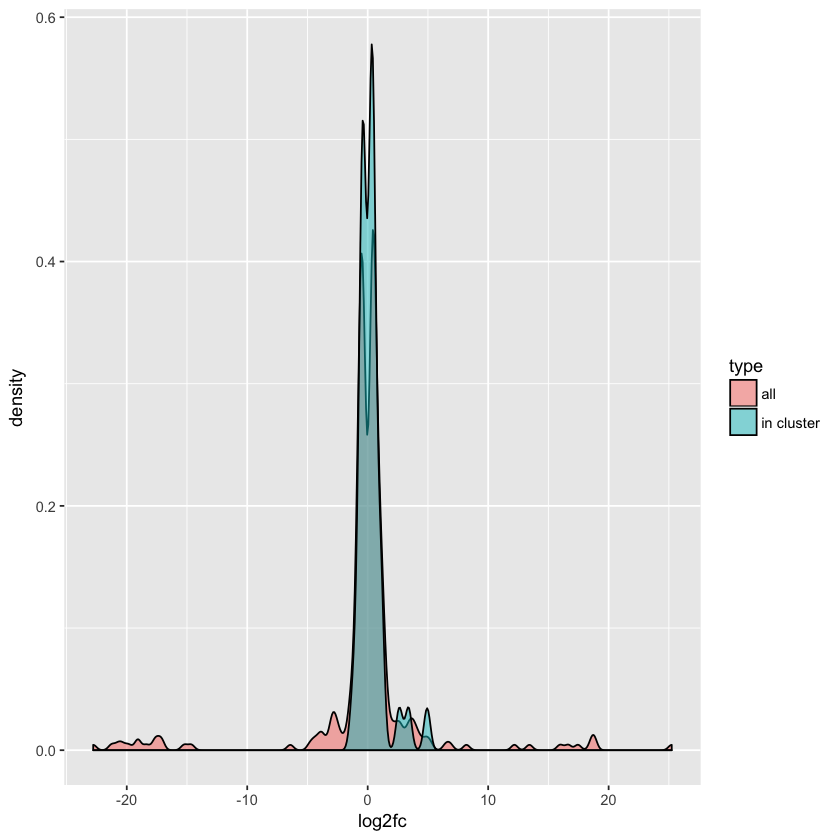

In [134]:
GF_vs_SPF_8w_data = rbind(GF_vs_SPF_8w %>% select(young), GF_vs_SPF_8w %>% filter(in_one_cluster) %>% select(young)) %>%
    rename(log2fc = young) %>%
    mutate(type = c(rep("all", dim(GF_vs_SPF_8w)[1]), rep("in cluster", sum(GF_vs_SPF_8w$in_one_cluster)))) 

ggplot(GF_vs_SPF_8w_data, aes(x = log2fc, fill = type)) + geom_density(alpha = 0.5)

### 52w

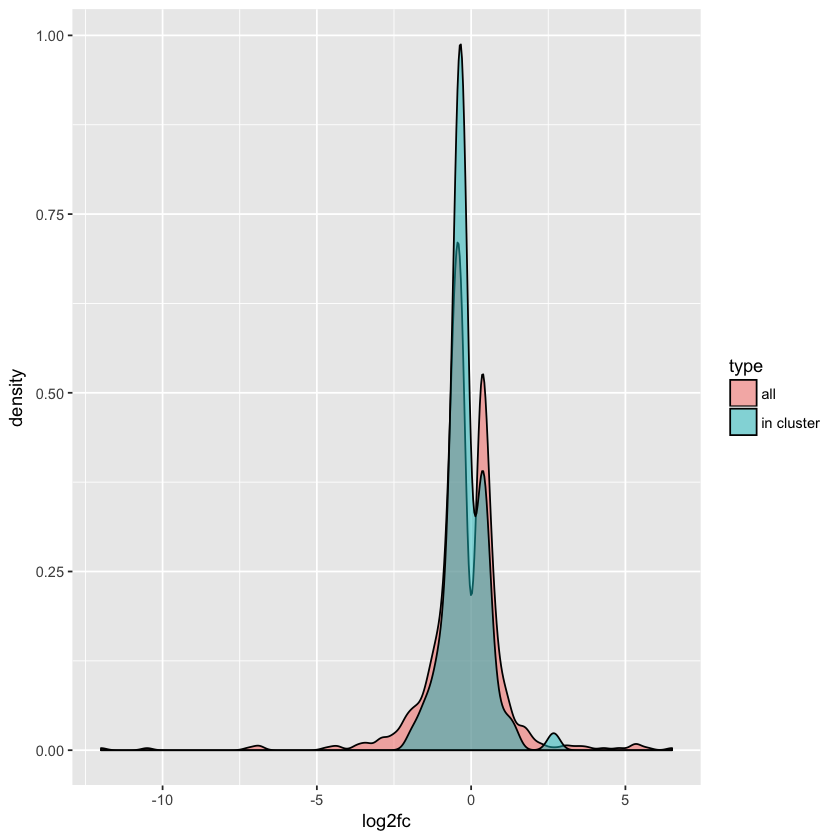

In [86]:
GF_vs_SPF_52w_data = rbind(GF_vs_SPF_52w %>% select(middle_age), GF_vs_SPF_52w %>% filter(in_one_cluster) %>% select(middle_age)) %>%
    rename(log2fc = middle_age) %>%
    mutate(type = c(rep("all", dim(GF_vs_SPF_52w)[1]), rep("in cluster", sum(GF_vs_SPF_52w$in_one_cluster)))) 

ggplot(GF_vs_SPF_52w_data, aes(x = log2fc, fill = type)) + geom_density(alpha = 0.5)

### 104w

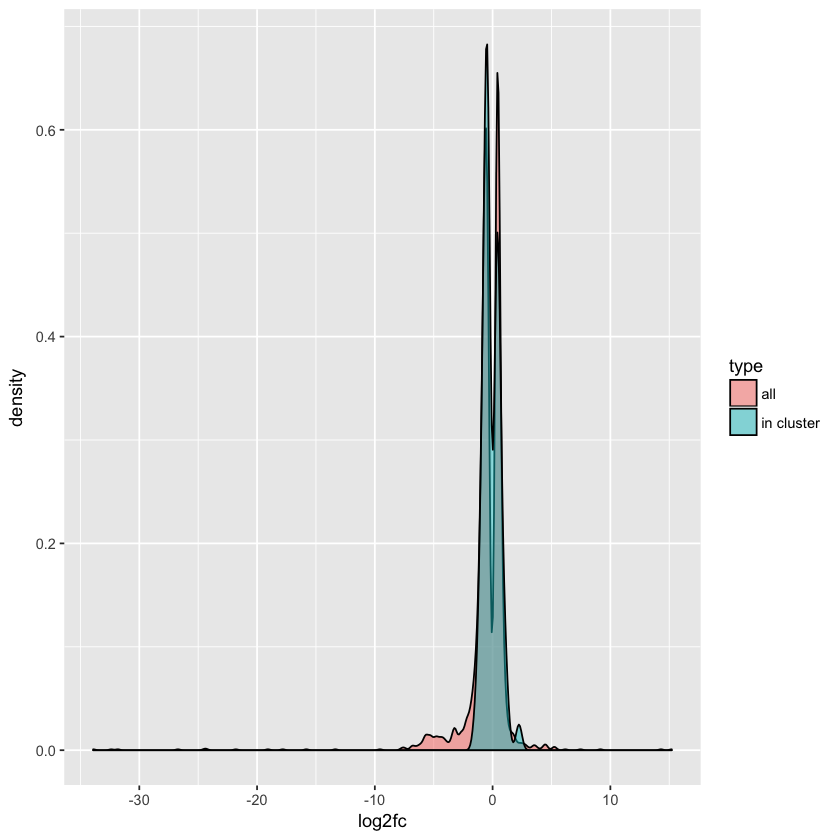

In [87]:
GF_vs_SPF_104w_data = rbind(GF_vs_SPF_104w %>% select(old), GF_vs_SPF_104w %>% filter(in_one_cluster) %>% select(old)) %>%
    rename(log2fc = old) %>%
    mutate(type = c(rep("all", dim(GF_vs_SPF_104w)[1]), rep("in cluster", sum(GF_vs_SPF_104w$in_one_cluster)))) 

ggplot(GF_vs_SPF_104w_data, aes(x = log2fc, fill = type)) + geom_density(alpha = 0.5)

## Z-scores

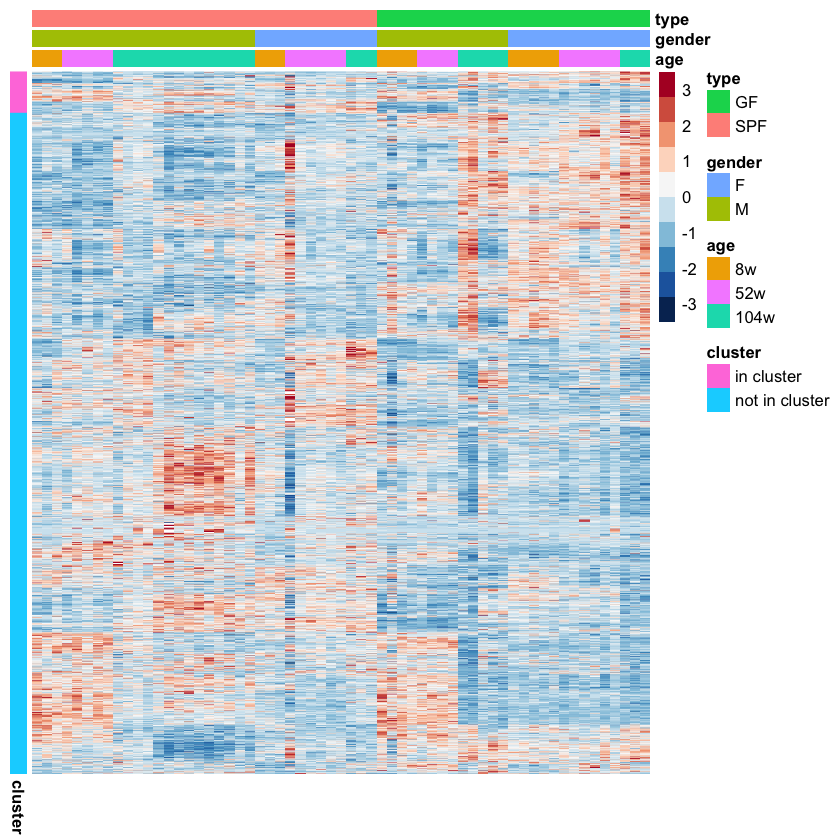

In [124]:
cluster_data = z_scores[cluster_genes,]
cluster_hc = hclust(dist(cluster_data), method = "complete")
non_cluster_data = z_scores[non_cluster_genes,]
non_cluster_hc = hclust(dist(non_cluster_data), method = "complete")
gene_order = c(cluster_genes[cluster_hc$order], non_cluster_genes[non_cluster_hc$order])

col_order = c(grep("SPF_8w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("SPF_52w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("SPF_8w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("SPF_52w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(z_scores), perl=TRUE, value=TRUE))
annot_col = as.data.frame(metadata[, c("age","gender", "type")])
annot_col$age = factor(annot_col$age,c("8w", "52w", "104w"))

annot_row = data.frame(cluster = c(rep("in cluster", length(cluster_genes)), rep("not in cluster", length(non_cluster_genes))))
rownames(annot_row) = c(gene_order)

pheatmap(z_scores[gene_order, col_order],
            cluster_rows=F,
            cluster_cols=F,
            show_rownames=F,
            show_colnames=F,
            annotation_col=annot_col,
            annotation_row=annot_row,
            annotation_colors = NULL,
            color=rev(brewer.pal(11, "RdBu")),
            breaks=seq(-3.5, 3.5, length=11))

### GF VS SPF (8w)

In [146]:
plot_z_score_heatmap_for_clusters = function(z_scores, GF_vs_SPF_age){
    GF_vs_SPF_age_cluster_genes = unlist(GF_vs_SPF_age %>% rownames_to_column('genes') %>% filter(in_one_cluster) %>% select(genes))
    GF_vs_SPF_age_non_cluster_genes = unlist(GF_vs_SPF_age %>% rownames_to_column('genes') %>% filter(!in_one_cluster) %>% select(genes))
    cluster_data = z_scores[GF_vs_SPF_age_cluster_genes,]
    cluster_hc = hclust(dist(cluster_data), method = "complete")
    non_cluster_data = z_scores[GF_vs_SPF_age_non_cluster_genes,]
    non_cluster_hc = hclust(dist(non_cluster_data), method = "complete")
    gene_order = c(GF_vs_SPF_age_cluster_genes[cluster_hc$order], GF_vs_SPF_age_non_cluster_genes[non_cluster_hc$order])

    col_order = c(grep("SPF_8w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("SPF_52w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("SPF_104w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("SPF_8w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("SPF_52w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("SPF_104w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("GF_8w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("GF_52w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("GF_104w_M_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("GF_8w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("GF_52w_F_+", colnames(z_scores), perl=TRUE, value=TRUE),
                      grep("GF_104w_F_+", colnames(z_scores), perl=TRUE, value=TRUE))
    annot_col = as.data.frame(metadata[, c("age","gender", "type")])
    annot_col$age = factor(annot_col$age,c("8w", "52w", "104w"))

    annot_row = data.frame(cluster = c(
        rep("in cluster", length(cluster_hc$order)),
        rep("not in cluster", length(non_cluster_hc$order))))
    rownames(annot_row) = c(gene_order)

    pheatmap(z_scores[gene_order, col_order],
                cluster_rows=F,
                cluster_cols=F,
                show_rownames=F,
                show_colnames=F,
                annotation_col=annot_col,
                annotation_row=annot_row,
                annotation_colors = NULL,
                color=rev(brewer.pal(11, "RdBu")),
                breaks=seq(-3.5, 3.5, length=11))
}

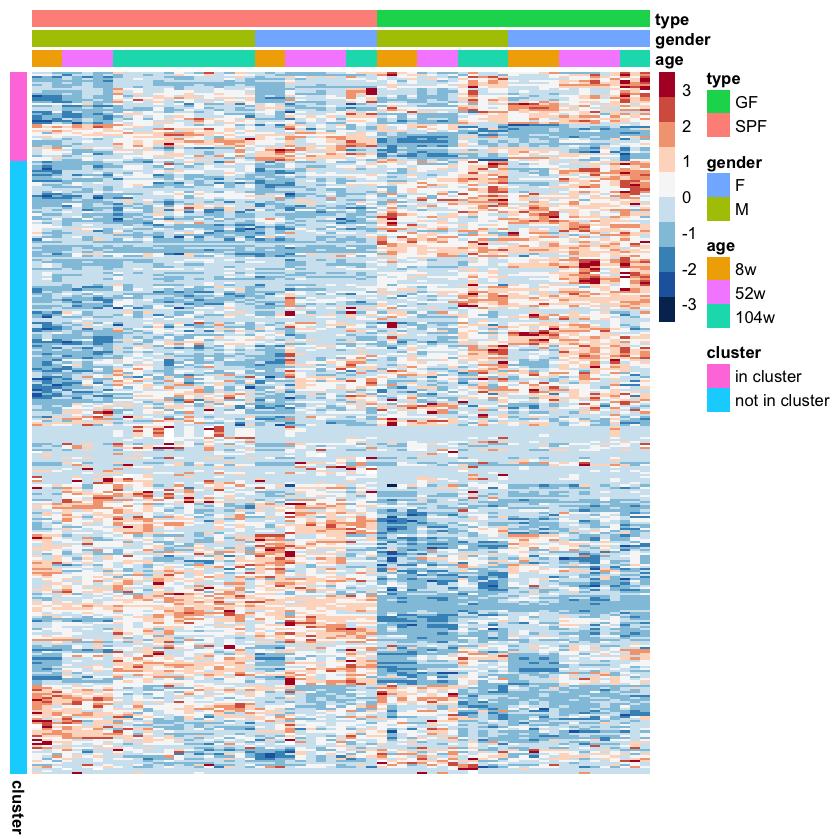

In [147]:
plot_z_score_heatmap_for_clusters(z_scores, GF_vs_SPF_8w)

### GF vs SPF (52w)

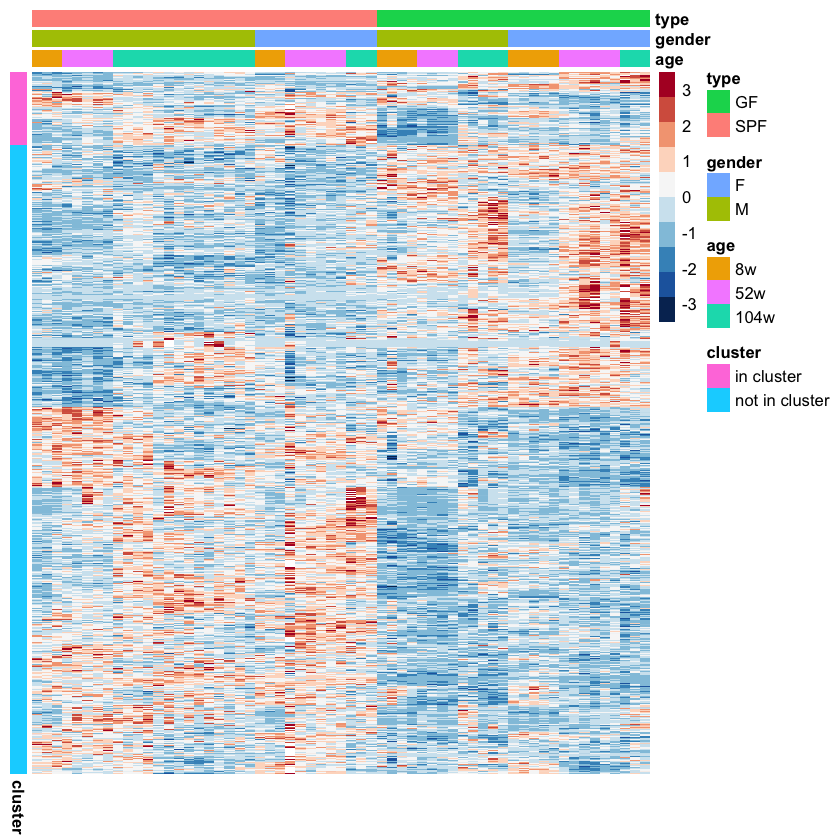

In [148]:
plot_z_score_heatmap_for_clusters(z_scores, GF_vs_SPF_52w)

### GF vs SPF (104w)

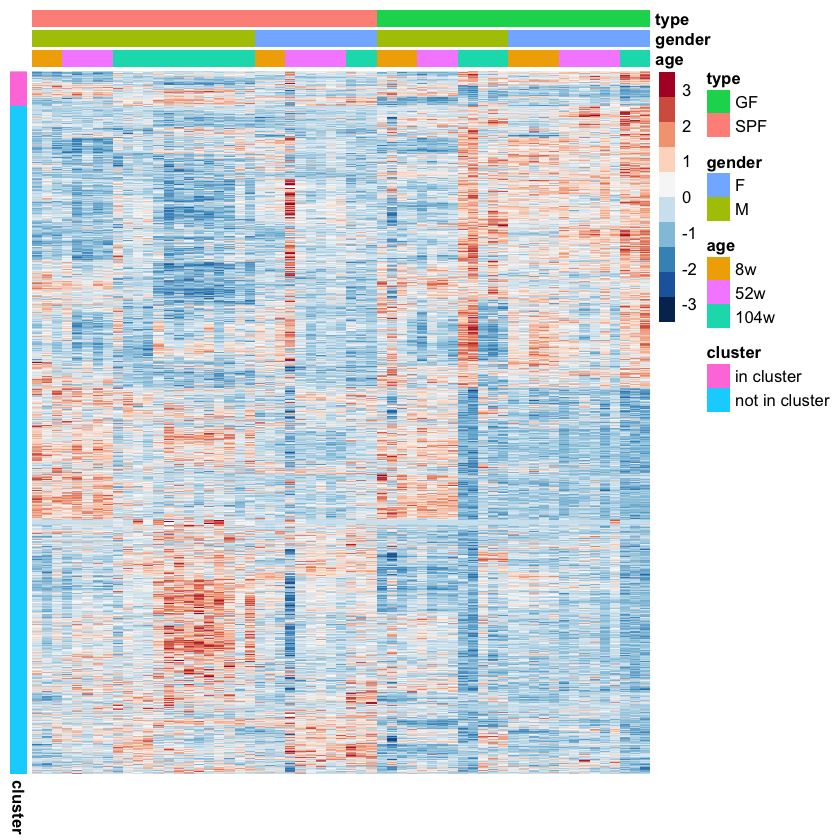

In [151]:
plot_z_score_heatmap_for_clusters(z_scores, GF_vs_SPF_104w)